In [1]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [82]:
# Read CSV and convert 'sale_date' to a PeriodIndex
df = pd.read_csv('data.csv', parse_dates=['sale_date'])
df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
new_df = df[df['sale_date'] < '2023-11-01']
print(df.shape)
df.set_index('sale_date', inplace=True)

# Example product_no and hosting_type
product_no = 5
hosting_type = 'Cloud'


# Call get_product_hosting_df
#df = get_product_hosting_df(new_df, product_no, hosting_type)
df = get_product_hosting_df(new_df, product_no, hosting_type)
# Group by 'sale_date' and sum
df = df.groupby('sale_date').sum()
df.shape



(415, 4)


(61, 3)

In [345]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['revenue'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.219879
p-value: 0.996120
Critical Values:
	1%: -3.568
	5%: -2.921
	10%: -2.599


(8, 3)

In [305]:
df.index


DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
      

In [398]:
df.shape

(82, 5)

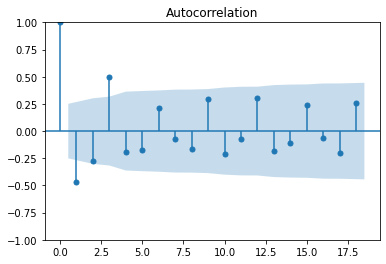

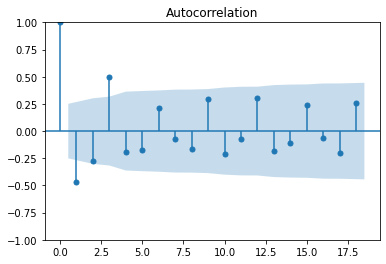

In [364]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.revenue.diff().dropna())

In [2]:
def get_product_hosting_df(df, product_no, hosting):
    # Filter the DataFrame based on product_no and hosting
    filtered_df = df[(df['product_id'] == f'Product {product_no}') & (df['hosting'] == hosting)]
    
    return filtered_df

In [3]:
def get_product_df(df, product_no):
    # Filter the DataFrame based on product_no and hosting
    filtered_df = df[(df['product_id'] == f'Product {product_no}')]
    
    return filtered_df

In [4]:
def get_hosting_type_df(df, hosting):
    # Filter the DataFrame based on product_no and hosting
    filtered_df = df[(df['hosting'] == hosting)]
    
    return filtered_df

<Axes: title={'center': 'revenue'}, xlabel='sale_date'>

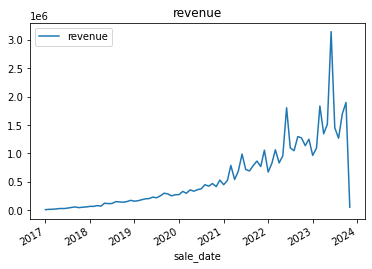

In [307]:
result_df[['revenue']].plot(title='revenue')

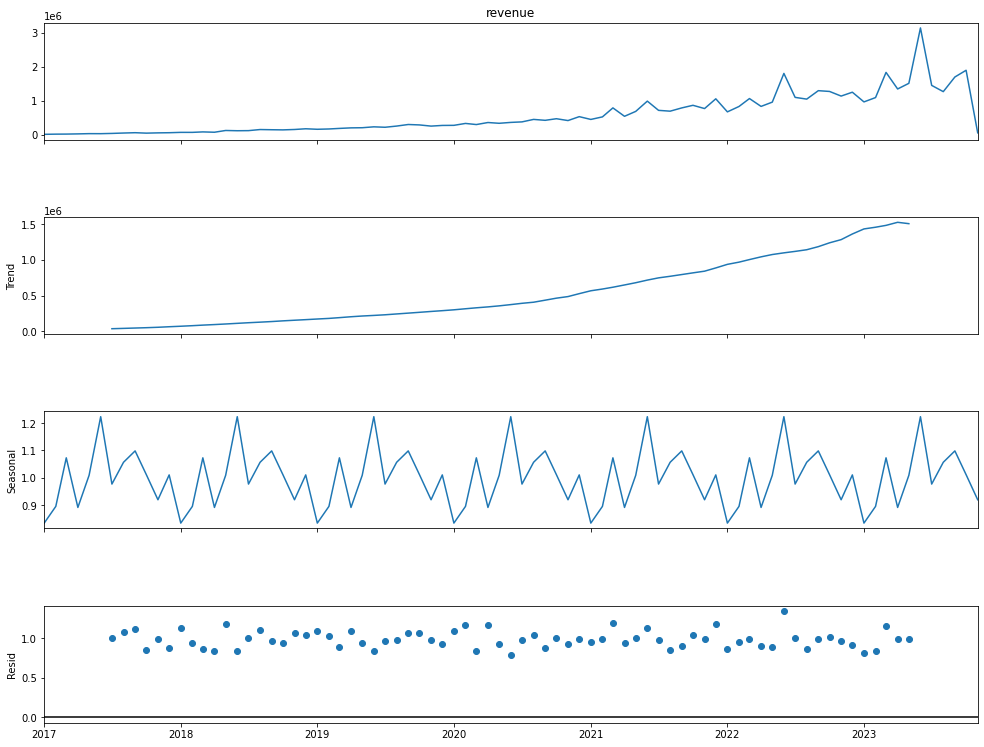

In [308]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have already performed seasonal decomposition
decompose_result = seasonal_decompose(df['revenue'], model='multiplicative')


# Plot the decomposed components


fig = decompose_result.plot()
fig.set_size_inches((15, 12))

In [309]:
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

In [310]:
df['HWES1'] = SimpleExpSmoothing(df['revenue']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues


C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


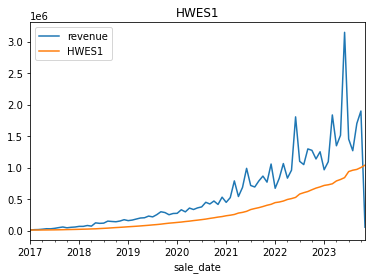

In [313]:
df[[ 'revenue','HWES1']].plot(title='HWES1');

C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


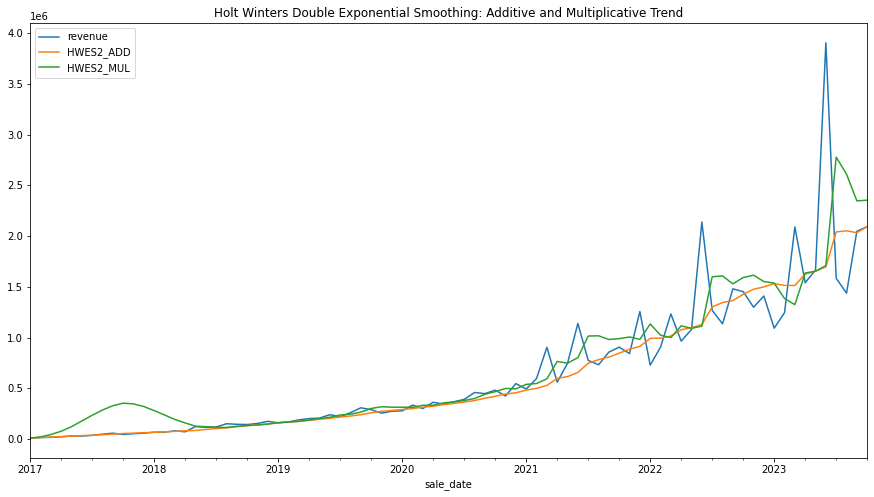

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'revenue' is the column you want to forecast
df['HWES2_ADD'] = ExponentialSmoothing(df['revenue'], trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['revenue'], trend='mul').fit().fittedvalues

# Plot the original 'revenue' and the fitted values from both additive and multiplicative models
df[['revenue', 'HWES2_ADD', 'HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend', figsize=(15, 8))
plt.show()

C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hans\anaconda3\lib\site-packag

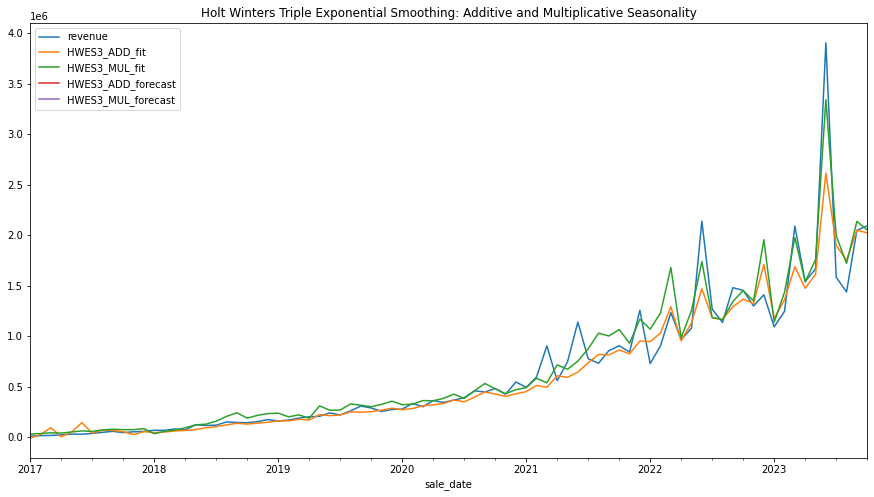

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

seasonal_periods = 12 

df['HWES3_ADD_fit'] = ExponentialSmoothing(df['revenue'], trend='add', seasonal='add', seasonal_periods=seasonal_periods).fit().fittedvalues
df['HWES3_MUL_fit'] = ExponentialSmoothing(df['revenue'], trend='mul', seasonal='mul', seasonal_periods=seasonal_periods).fit().fittedvalues

# Forecast using both additive and multiplicative models with seasonal components
model_add_seasonal = ExponentialSmoothing(df['revenue'], trend='add', seasonal='add', seasonal_periods=seasonal_periods)
model_mul_seasonal = ExponentialSmoothing(df['revenue'], trend='mul', seasonal='mul', seasonal_periods=seasonal_periods)
df['HWES3_ADD_forecast'] = model_add_seasonal.fit().forecast(steps=len(df))
df['HWES3_MUL_forecast'] = model_mul_seasonal.fit().forecast(steps=len(df))

# Plot the original 'revenue', fitted values, and forecasts
df[['revenue', 'HWES3_ADD_fit', 'HWES3_MUL_fit', 'HWES3_ADD_forecast', 'HWES3_MUL_forecast']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality', figsize=(15, 8))
plt.show()

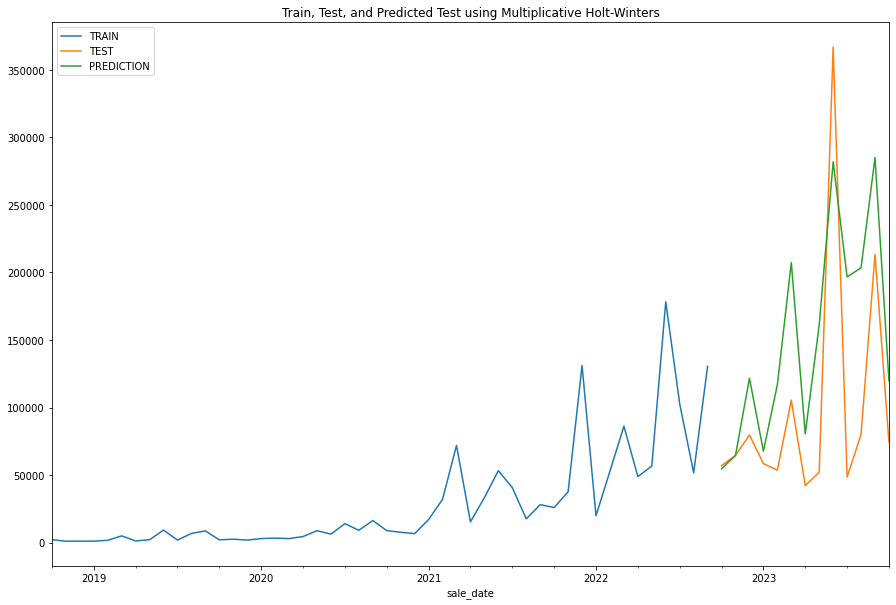

In [84]:

# Assuming 'revenue' is the column you want to forecast
seasonal_periods = 12  # Assuming monthly seasonality, adjust as needed

train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]


fitted_model = ExponentialSmoothing(train_df['revenue'], trend='mul', seasonal='mul', seasonal_periods=seasonal_periods).fit()


test_predictions = fitted_model.forecast(len(test_df))


plt.figure(figsize=(15, 10))

# Plot the training data
train_df['revenue'].plot(legend=True, label='TRAIN')

# Plot the test data
test_df['revenue'].plot(legend=True, label='TEST')

# Plot the predicted values for the test data
test_predictions.plot(legend=True, label='PREDICTION')

plt.title('Train, Test, and Predicted Test using Multiplicative Holt-Winters')
plt.show()

In [60]:
test_df

,product_id,hosting,revenue
sale_date,,,
2022-10-01,Product 5,Cloud,56906.141
2022-11-01,Product 5,Cloud,64549.481
2022-12-01,Product 5,Cloud,79700.791
2023-01-01,Product 5,Cloud,58483.991
2023-02-01,Product 5,Cloud,53614.621
2023-03-01,Product 5,Cloud,105453.311
2023-04-01,Product 5,Cloud,42191.481
2023-05-01,Product 5,Cloud,52117.591
2023-06-01,Product 5,Cloud,366984.401


In [ ]:
test_predictions

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae = mean_absolute_error(test_df['revenue'], test_predictions)
print(f'Mean Absolute Error (MAE) = {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_df['revenue'], test_predictions)
print(f'Mean Squared Error (MSE) = {mse}')

mape = mean_absolute_percentage_error(test_df['revenue'], test_predictions)
print(f'Mean_absolute_percentage_error (MSE) = {mape}')

Mean Absolute Error (MAE) = 64584.59194668876
Mean Squared Error (MSE) = 6247823781.625446
Mean_absolute_percentage_error (MSE) = 0.8960231934102739


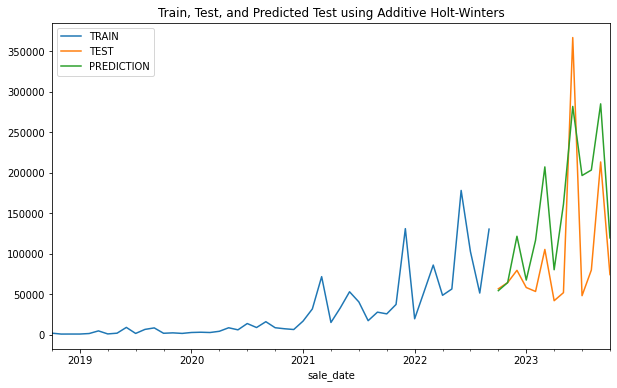

In [76]:

# Assuming 'revenue' is the column you want to forecast
seasonal_periods = 12  # Assuming monthly seasonality, adjust as needed

df = pd.read_csv('data.csv', parse_dates=['sale_date'])
df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
new_df = df[df['sale_date'] < '2023-11-01']
new_df.set_index('sale_date', inplace=True)
df = get_product_hosting_df(new_df, product_no, hosting_type)
df = df.groupby('sale_date').sum()
df['revenue'] = df['revenue'] + 0.001


train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]


fitted_model = ExponentialSmoothing(train_df['revenue'], trend='mul', seasonal='mul', seasonal_periods=seasonal_periods).fit()


test_predictions = fitted_model.forecast(len(test_df))


plt.figure(figsize=(10, 6))

# Plot the training data
train_df['revenue'].plot(legend=True, label='TRAIN')

# Plot the test data
test_df['revenue'].plot(legend=True, label='TEST')

# Plot the predicted values for the test data
test_predictions.plot(legend=True, label='PREDICTION')

plt.title('Train, Test, and Predicted Test using Additive Holt-Winters')
plt.show()

In [79]:
len(test_df)

13

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_df['revenue'], test_predictions)
print(f'Mean Absolute Error (MAE) = {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_df['revenue'], test_predictions)
print(f'Mean Squared Error (MSE) = {mse}')

mape = mean_absolute_percentage_error(test_df['revenue'], test_predictions)
print(f'Mean_absolute_percentage_error (MSE) = {mape}')

Mean Absolute Error (MAE) = 64584.582829093226
Mean Squared Error (MSE) = 6247821925.9062605
Mean_absolute_percentage_error (MSE) = 0.8960230413759667


0.28852613096214486 ('add', 'add', 12)
0.34517009862375303 ('add', 'mul', 12)
0.2563385996929954 ('mul', 'add', 12)
0.4046414981919014 ('mul', 'mul', 12)
MAPE = 0.2563385996929954 hosting_type =  Data Center product_no = 1
0.2728193374584077 ('add', 'add', 12)
0.264275897392027 ('add', 'mul', 12)
0.2845682504703333 ('mul', 'add', 12)
0.2641268695015815 ('mul', 'mul', 12)
MAPE = 0.2641268695015815 hosting_type =  Data Center product_no = 2
1.8035005237255852 ('add', 'add', 12)
3141.908823466124 ('add', 'mul', 12)
1.922755317993977 ('mul', 'add', 12)
9.735281404846007e+29 ('mul', 'mul', 12)
sale_date
2023-04-01    14905.433596
2023-05-01    13222.078222
2023-06-01    16461.954037
2023-07-01    11241.695050
2023-08-01    22673.853703
2023-09-01     8262.869545
2023-10-01     6312.462150
dtype: float64
MAPE = 1.8035005237255852 hosting_type =  Data Center product_no = 3
0.20469005585009134 ('add', 'add', 12)
0.2175418857335874 ('add', 'mul', 12)
0.3663105918243438 ('mul', 'add', 12)
0.2209

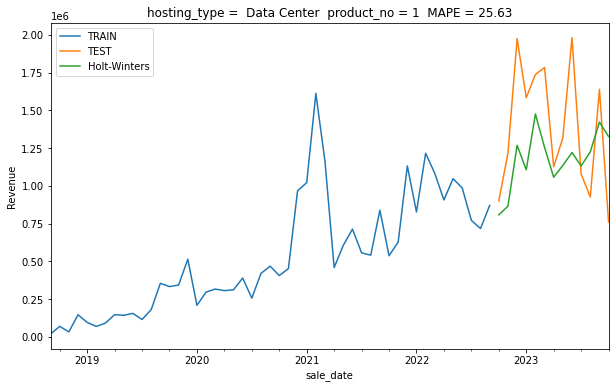

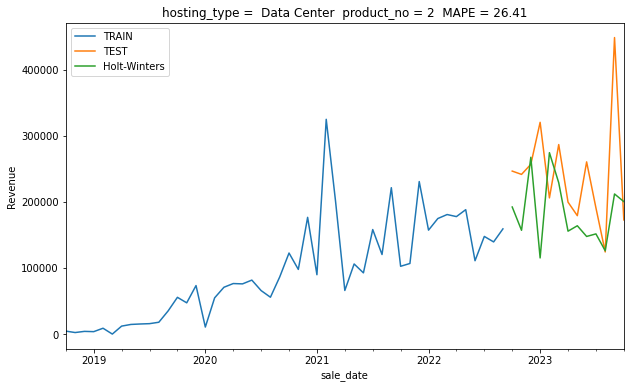

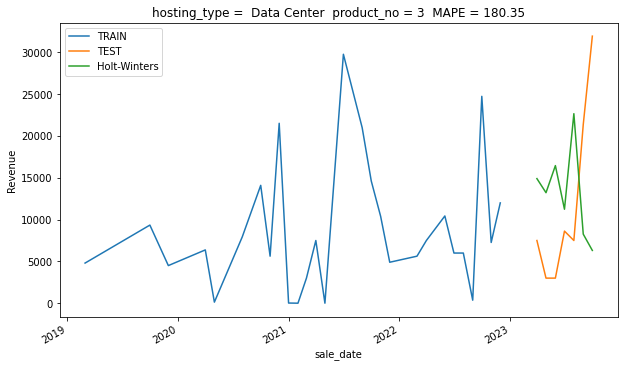

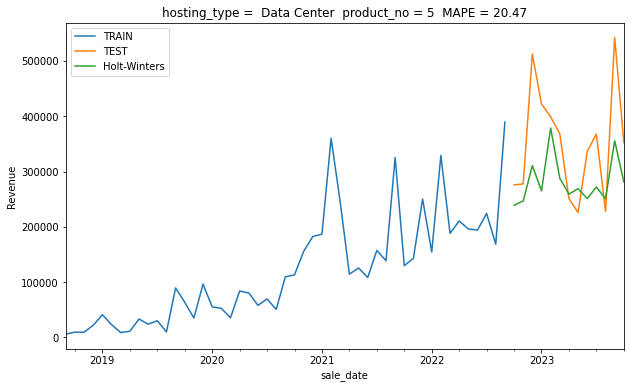

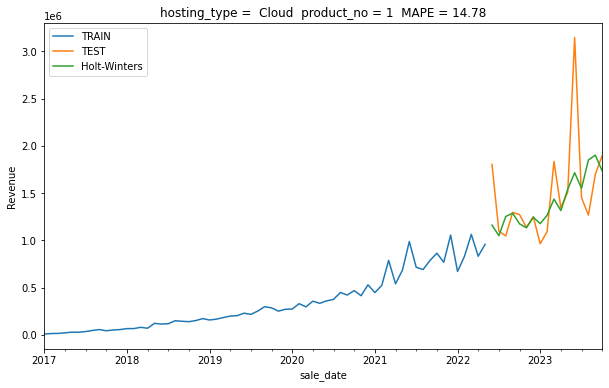

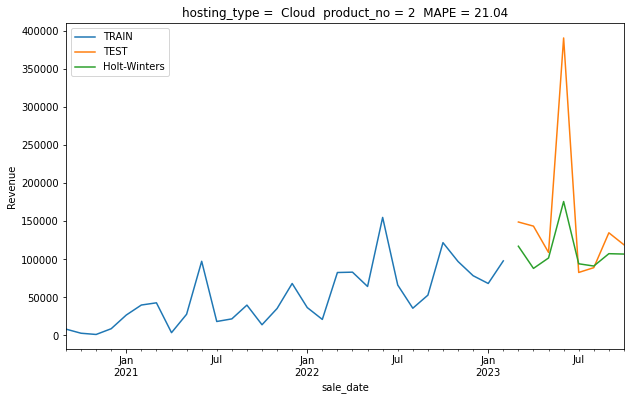

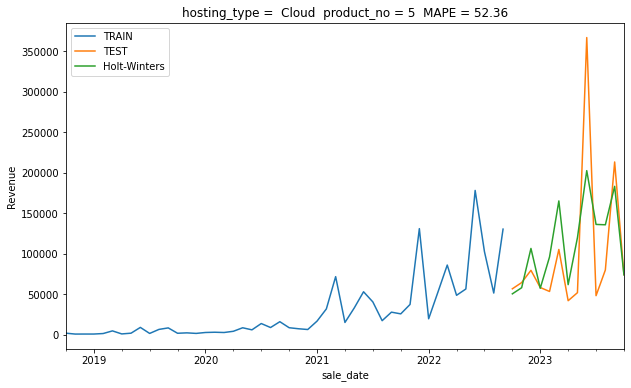

In [10]:
import itertools
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")




for hosting_type in ['Data Center','Cloud']:
    for product_no in range(1,6):
        df = pd.read_csv('data.csv', parse_dates=['sale_date'])
        df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
        new_df = df[df['sale_date'] < '2023-11-01']
        df.set_index('sale_date', inplace=True)
        df = get_product_hosting_df(new_df, product_no, hosting_type)
        df = df.groupby('sale_date').sum()
        df['revenue'] = df['revenue'] + 0.001
        
        train_size = int(len(df) * 0.8)
        train_df = df.iloc[:train_size]
        test_df = df.iloc[train_size:]
        # Define hyperparameter grids
        trend_options = ['add', 'mul']
        seasonal_options = ['add', 'mul']
        seasonal_periods_options = [12]  # Adjust based on your data's seasonality
        #print(train_df.head())
        if len(train_df)<24:
            continue

        # Create a grid of hyperparameter combinations
        param_grid = list(itertools.product(trend_options, seasonal_options, seasonal_periods_options))

        best_mape = float('inf')
        best_params = None

        # Iterate through hyperparameter combinations
        for params in param_grid:
            trend, seasonal, seasonal_periods = params

            # Fit the model
            model = ExponentialSmoothing(train_df['revenue'], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods).fit()

            # Make predictions on the validation set
            val_predictions = model.forecast(len(test_df))

            # Calculate MAPE
            mape = mean_absolute_percentage_error(test_df['revenue'], val_predictions)
            print(mape, params)

            # Update best parameters if current MAPE is lower
            if mape < best_mape:
                best_mape = mape
                best_params = params

        # Use the best parameters to fit the final model
        final_model = ExponentialSmoothing(train_df['revenue'], trend=best_params[0], seasonal=best_params[1], seasonal_periods=best_params[2]).fit()
        
        # Make predictions on the test set using the final model
        final_predictions = final_model.forecast(len(test_df))
        
        
        # Plot the results
        plt.figure(figsize=(10, 6))
        
        final_predictions.index = test_df.index
       

        # Plot the training data
        train_df['revenue'].plot(legend=True, label='TRAIN')

        # Plot the test data
        test_df['revenue'].plot(legend=True, label='TEST')

        # Plot the predicted values using ARIMA
        final_predictions.plot(legend=True, label='Holt-Winters')

        mape = mean_absolute_percentage_error(test_df['revenue'], final_predictions)
        if mape >1:
            print(final_predictions)
        plt.title(f'hosting_type =  {hosting_type}  ' +  f'product_no = {product_no}' + f'  MAPE = {round(100*mape,2)}')
        plt.ylabel("Revenue")
        print(f'MAPE = {mape}', f'hosting_type =  {hosting_type}', f'product_no = {product_no}')






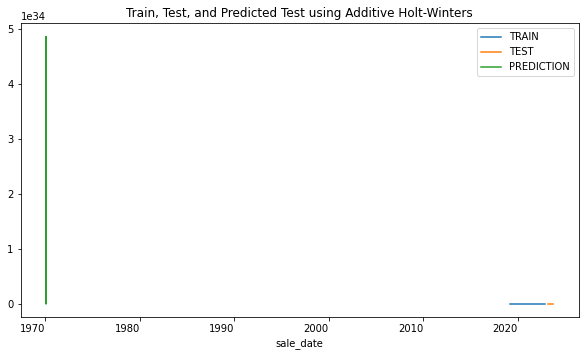

In [101]:
# Assuming 'revenue' is the column you want to forecast
seasonal_periods = 12  # Assuming monthly seasonality, adjust as needed

df = pd.read_csv('data.csv', parse_dates=['sale_date'])
df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
new_df = df[df['sale_date'] < '2023-11-01']
new_df.set_index('sale_date', inplace=True)
df = get_product_hosting_df(new_df, 3, "Data Center")
df = df.groupby('sale_date').sum()
df['revenue'] = df['revenue'] + 0.001


train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]


fitted_model = ExponentialSmoothing(train_df['revenue'], trend='mul', seasonal='mul', seasonal_periods=seasonal_periods).fit()


test_predictions = fitted_model.forecast(len(test_df))


plt.figure(figsize=(10, 6))

# Plot the training data
train_df['revenue'].plot(legend=True, label='TRAIN')

# Plot the test data
test_df['revenue'].plot(legend=True, label='TEST')

# Plot the predicted values for the test data
test_predictions.plot(legend=True, label='PREDICTION')

plt.title('Train, Test, and Predicted Test using Additive Holt-Winters')
plt.show()

In [100]:
train_df

,product_id,hosting,revenue
sale_date,,,
2019-03-01,Product 3,Data Center,4800.00
2019-10-01,Product 3,Data Center,9345.19
2019-12-01,Product 3,Data Center,4500.00
2020-04-01,Product 3,Data Center,6375.00
2020-05-01,Product 3,Data Center,127.06
2020-08-01,Product 3,Data Center,7928.25
2020-10-01,Product 3,Data Center,14100.00
2020-11-01,Product 3,Data Center,5625.00
2020-12-01,Product 3,Data Center,21525.00


In [97]:
test_df.shape

(7, 3)

ValueError: min() arg is an empty sequence

In [23]:
!pip install scikit-optimize

C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Hans\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: d

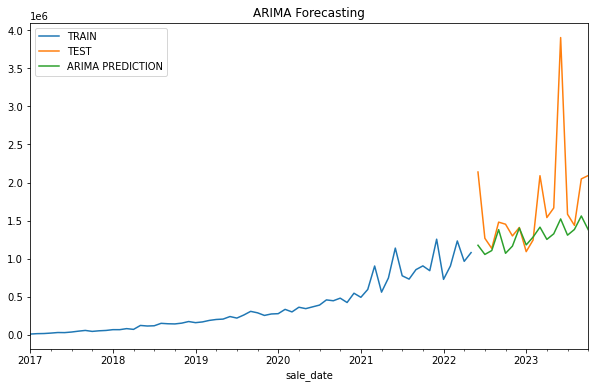

ARIMA Mean Absolute Error (MAE) = 421415.06092051964
ARIMA Mean Squared Error (MSE) = 488685169839.8745
Mean_absolute_percentage_error (MSE) = 0.17119768283266876


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Assuming 'revenue' is the column you want to forecast
# Assuming 'df' is your DataFrame

# Splitting the data into training and test sets
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Fit ARIMA model on the training data
p, d, q = 9, 1, 2  # Example values for ARIMA(p, d, q) order, adjust as needed
arima_model = ARIMA(train_df['revenue'], order=(p, d, q)).fit()

# Make predictions on the test data
arima_predictions = arima_model.predict(start=len(train_df), end=len(df)-1, typ='levels')

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the training data
train_df['revenue'].plot(legend=True, label='TRAIN')

# Plot the test data
test_df['revenue'].plot(legend=True, label='TEST')

# Plot the predicted values using ARIMA
arima_predictions.plot(legend=True, label='ARIMA PREDICTION')

plt.title('ARIMA Forecasting')
plt.show()

# Calculate Mean Absolute Error (MAE)
arima_mae = mean_absolute_error(test_df['revenue'], arima_predictions)
print(f'ARIMA Mean Absolute Error (MAE) = {arima_mae}')

# Calculate Mean Squared Error (MSE)
arima_mse = mean_squared_error(test_df['revenue'], arima_predictions)
print(f'ARIMA Mean Squared Error (MSE) = {arima_mse}')

arima_mape = mean_absolute_percentage_error(test_df['revenue'], test_predictions)
print(f'Mean_absolute_percentage_error (MSE) = {arima_mape}')

In [43]:
import warnings
warnings.filterwarnings("ignore")

                                                   product_id  \
sale_date                                                       
2022-06-01  Product 1Product 2Product 5Product 5Product 3P...   
2022-07-01  Product 1Product 3Product 1Product 5Product 5P...   
2022-08-01  Product 1Product 2Product 3Product 1Product 2P...   
2022-09-01  Product 2Product 1Product 2Product 3Product 1P...   
2022-10-01  Product 5Product 2Product 1Product 3Product 2P...   

                                                      hosting      revenue  \
sale_date                                                                    
2022-06-01  Data CenterData CenterCloudData CenterData Cen...  3439678.551   
2022-07-01  Data CenterData CenterCloudData CenterCloudDat...  2417059.021   
2022-08-01  Data CenterCloudData CenterCloudData CenterClo...  2165986.161   
2022-09-01  Data CenterData CenterCloudData CenterCloudDat...  2899003.861   
2022-10-01  Data CenterCloudData CenterData CenterData Cen...  2899730.541  

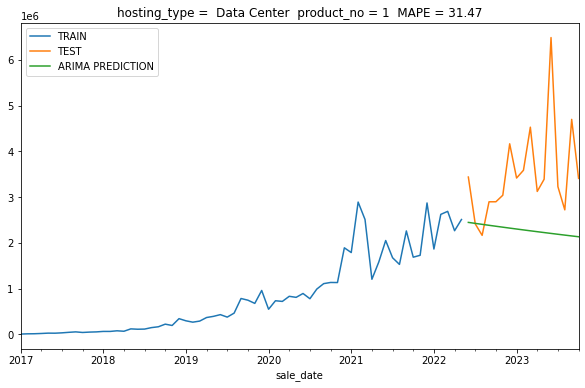

                                                   product_id  \
sale_date                                                       
2022-06-01  Product 1Product 2Product 5Product 5Product 3P...   
2022-07-01  Product 1Product 3Product 1Product 5Product 5P...   
2022-08-01  Product 1Product 2Product 3Product 1Product 2P...   
2022-09-01  Product 2Product 1Product 2Product 3Product 1P...   
2022-10-01  Product 5Product 2Product 1Product 3Product 2P...   

                                                      hosting      revenue  \
sale_date                                                                    
2022-06-01  Data CenterData CenterCloudData CenterData Cen...  3439678.551   
2022-07-01  Data CenterData CenterCloudData CenterCloudDat...  2417059.021   
2022-08-01  Data CenterCloudData CenterCloudData CenterClo...  2165986.161   
2022-09-01  Data CenterData CenterCloudData CenterCloudDat...  2899003.861   
2022-10-01  Data CenterCloudData CenterData CenterData Cen...  2899730.541  

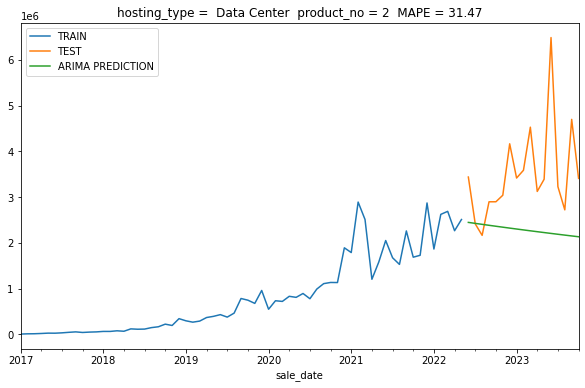

                                                   product_id  \
sale_date                                                       
2022-06-01  Product 1Product 2Product 5Product 5Product 3P...   
2022-07-01  Product 1Product 3Product 1Product 5Product 5P...   
2022-08-01  Product 1Product 2Product 3Product 1Product 2P...   
2022-09-01  Product 2Product 1Product 2Product 3Product 1P...   
2022-10-01  Product 5Product 2Product 1Product 3Product 2P...   

                                                      hosting      revenue  \
sale_date                                                                    
2022-06-01  Data CenterData CenterCloudData CenterData Cen...  3439678.551   
2022-07-01  Data CenterData CenterCloudData CenterCloudDat...  2417059.021   
2022-08-01  Data CenterCloudData CenterCloudData CenterClo...  2165986.161   
2022-09-01  Data CenterData CenterCloudData CenterCloudDat...  2899003.861   
2022-10-01  Data CenterCloudData CenterData CenterData Cen...  2899730.541  

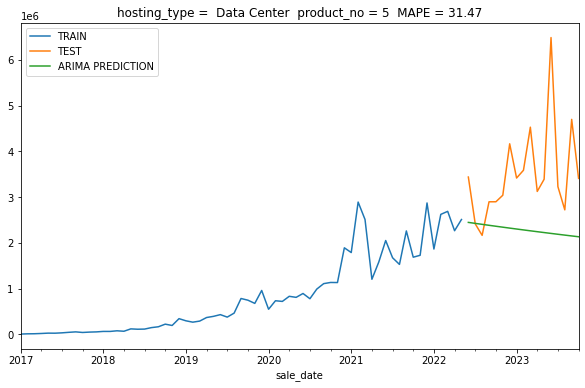

                                                   product_id  \
sale_date                                                       
2022-06-01  Product 1Product 2Product 5Product 5Product 3P...   
2022-07-01  Product 1Product 3Product 1Product 5Product 5P...   
2022-08-01  Product 1Product 2Product 3Product 1Product 2P...   
2022-09-01  Product 2Product 1Product 2Product 3Product 1P...   
2022-10-01  Product 5Product 2Product 1Product 3Product 2P...   

                                                      hosting      revenue  \
sale_date                                                                    
2022-06-01  Data CenterData CenterCloudData CenterData Cen...  3439678.551   
2022-07-01  Data CenterData CenterCloudData CenterCloudDat...  2417059.021   
2022-08-01  Data CenterCloudData CenterCloudData CenterClo...  2165986.161   
2022-09-01  Data CenterData CenterCloudData CenterCloudDat...  2899003.861   
2022-10-01  Data CenterCloudData CenterData CenterData Cen...  2899730.541  

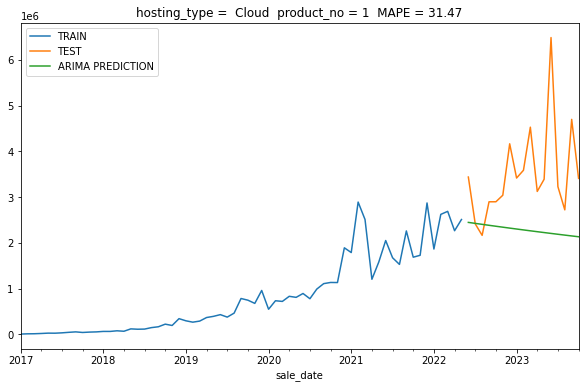

                                                   product_id  \
sale_date                                                       
2022-06-01  Product 1Product 2Product 5Product 5Product 3P...   
2022-07-01  Product 1Product 3Product 1Product 5Product 5P...   
2022-08-01  Product 1Product 2Product 3Product 1Product 2P...   
2022-09-01  Product 2Product 1Product 2Product 3Product 1P...   
2022-10-01  Product 5Product 2Product 1Product 3Product 2P...   

                                                      hosting      revenue  \
sale_date                                                                    
2022-06-01  Data CenterData CenterCloudData CenterData Cen...  3439678.551   
2022-07-01  Data CenterData CenterCloudData CenterCloudDat...  2417059.021   
2022-08-01  Data CenterCloudData CenterCloudData CenterClo...  2165986.161   
2022-09-01  Data CenterData CenterCloudData CenterCloudDat...  2899003.861   
2022-10-01  Data CenterCloudData CenterData CenterData Cen...  2899730.541  

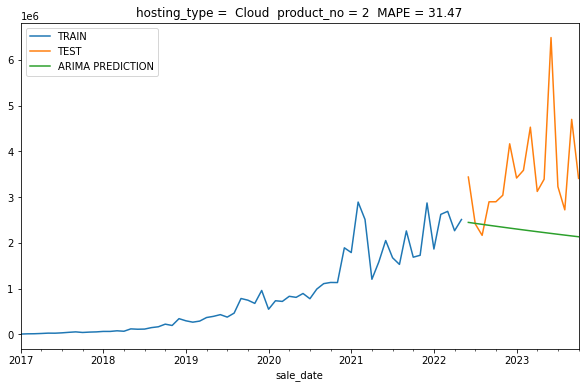

                                                   product_id  \
sale_date                                                       
2022-06-01  Product 1Product 2Product 5Product 5Product 3P...   
2022-07-01  Product 1Product 3Product 1Product 5Product 5P...   
2022-08-01  Product 1Product 2Product 3Product 1Product 2P...   
2022-09-01  Product 2Product 1Product 2Product 3Product 1P...   
2022-10-01  Product 5Product 2Product 1Product 3Product 2P...   

                                                      hosting      revenue  \
sale_date                                                                    
2022-06-01  Data CenterData CenterCloudData CenterData Cen...  3439678.551   
2022-07-01  Data CenterData CenterCloudData CenterCloudDat...  2417059.021   
2022-08-01  Data CenterCloudData CenterCloudData CenterClo...  2165986.161   
2022-09-01  Data CenterData CenterCloudData CenterCloudDat...  2899003.861   
2022-10-01  Data CenterCloudData CenterData CenterData Cen...  2899730.541  

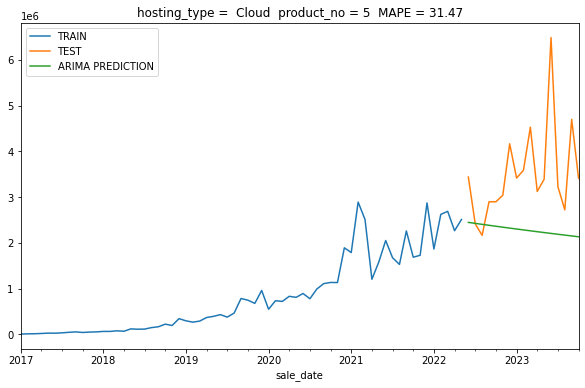

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

# Assuming 'revenue' is the column you want to forecast
# Assuming 'df' is your DataFrame
for hosting_type in ['Data Center','Cloud']:
    for product_no in [1,2,5]:
        # Splitting the data into training and test sets
        df = pd.read_csv('data.csv', parse_dates=['sale_date'])
        df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
        new_df = df[df['sale_date'] < '2023-11-01']
        df.set_index('sale_date', inplace=True)
        df = get_product_hosting_df(new_df, product_no, hosting_type)
        df = df.groupby('sale_date').sum()
        df['revenue'] = df['revenue'] + 0.001
        df['log_revenue'] = np.log1p(df['revenue'])
        train_size = int(len(df) * 0.8)
        train_df = df.iloc[:train_size]
        test_df = df.iloc[train_size:]
        print(test_df.head())

        # Define a range of values for p, d, and q
        p_values = range(1, 2) #1,8
        d_values = range(0, 1) # 03
        q_values = range(1, 2)# 1 10 

        best_mape = float('inf')
        best_params = None

        

        # Perform a grid search over the parameter space
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    if d ==0:
                        print(p)
                    # Fit ARIMA model on the training data
                    arima_model = ARIMA(train_df['log_revenue'], order=(p, d, q)).fit()

                    # Make predictions on the test data
                    arima_predictions = np.expm1(arima_model.predict(start=len(train_df), end=len(df)-1, typ='levels'))

                    # Calculate MAPE
                    mape = mean_absolute_percentage_error(test_df['revenue'], arima_predictions)

                    # Update best parameters if current MAPE is lower
                    if mape < best_mape:
                        best_mape = mape
                        best_params = (p, d, q)

        # Use the best parameters to fit the final ARIMA model
        final_arima_model = ARIMA(train_df['log_revenue'], order=best_params).fit()

        # Make predictions on the test set using the final ARIMA model
        final_arima_predictions = np.expm1(final_arima_model.predict(start=len(train_df), end=len(df)-1, typ='levels'))

        # Plot the results
        plt.figure(figsize=(10, 6))

        # Plot the training data
        train_df['revenue'].plot(legend=True, label='TRAIN')

        # Plot the test data
        test_df['revenue'].plot(legend=True, label='TEST')

        # Plot the predicted values using the final ARIMA model
        final_arima_predictions.plot(legend=True, label='ARIMA PREDICTION')

        plt.title('ARIMA Forecasting with Manual Hyperparameter Tuning')
        arima_mape = mean_absolute_percentage_error(test_df['revenue'], final_arima_predictions)
        plt.title(f'hosting_type =  {hosting_type}  ' +  f'product_no = {product_no}' + f'  MAPE = {round(100*arima_mape,2)}')
        print(f'MAPE = {sarima_mape}', f'hosting_type =  {hosting_type}', f'product_no = {product_no}',f'Best Parameters: {best_params}')
        plt.show()


# New ARIMA pipeline

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
Something went wrong
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
Something went wrong
MAPE = 0.4778296546989868 hosting_type = Data Center product_no = 1 Best Parameters: (4, 0, 9)


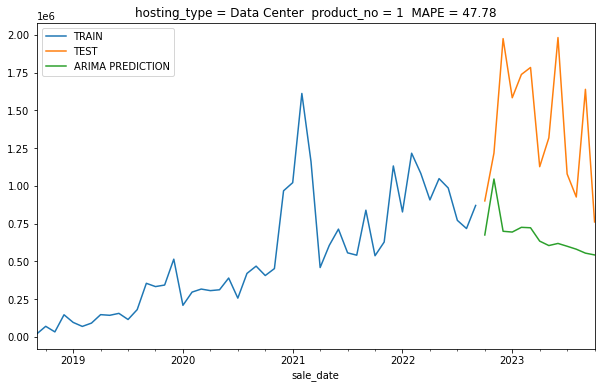

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
Something went wrong
6 0
6 0
6 0
6 0
6 0
6 0
Something went wrong
7 0
7 0
7 0
Something went wrong
7 0
Something went wrong
7 0
7 0
7 0
7 0
7 0
Something went wrong
MAPE = 0.2459902813813728 hosting_type = Data Center product_no = 2 Best Parameters: (2, 1, 8)


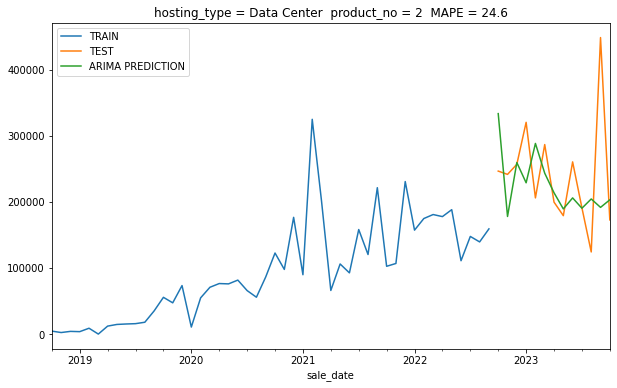

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
MAPE = 0.35188262449195495 hosting_type = Data Center product_no = 5 Best Parameters: (6, 1, 7)


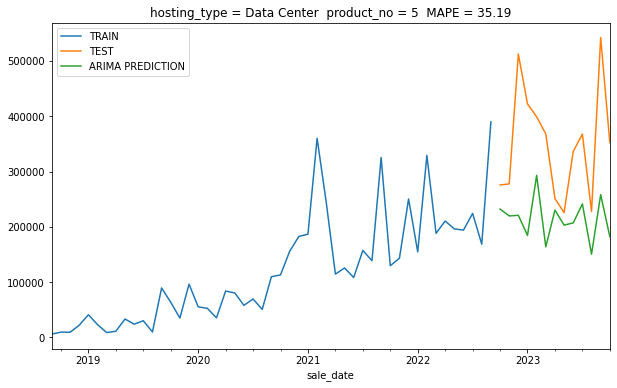

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
Something went wrong
MAPE = 0.1533429818254606 hosting_type = Cloud product_no = 1 Best Parameters: (3, 2, 4)


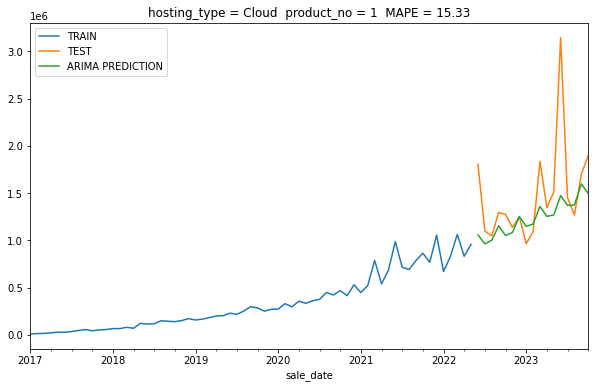

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
Something went wrong
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
Something went wrong
6 0
6 0
6 0
6 0
6 0
6 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
MAPE = 0.4221437869280985 hosting_type = Cloud product_no = 2 Best Parameters: (2, 0, 8)


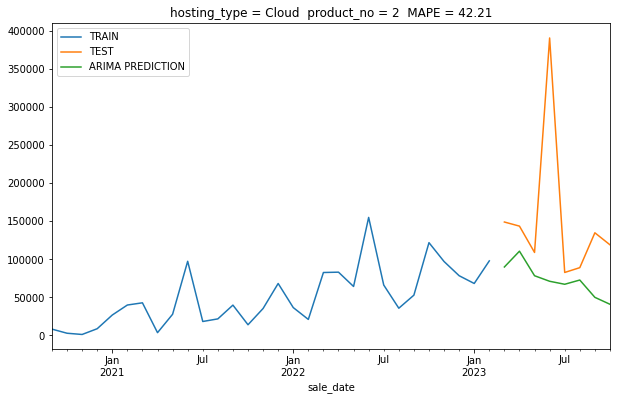

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
Something went wrong
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
MAPE = 0.9125926668369898 hosting_type = Cloud product_no = 5 Best Parameters: (4, 0, 8)


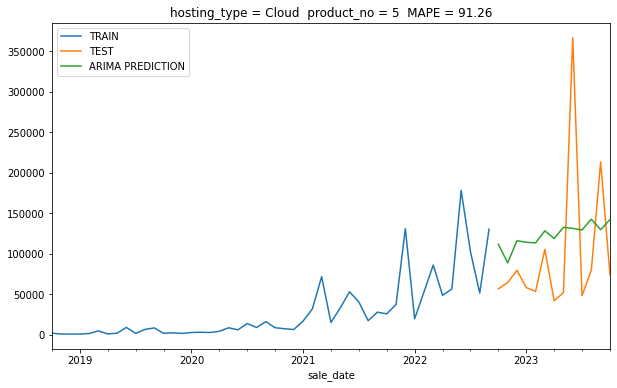

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")



for hosting_type in ['Data Center', 'Cloud']:
    for product_no in [1, 2, 5]:
        df = pd.read_csv('data.csv', parse_dates=['sale_date'])
        df['sale_date'] = pd.to_datetime(df['sale_date'].dt.strftime('%Y-%m'))
        new_df = df[df['sale_date'] < '2023-11-01']
        new_df.set_index('sale_date', inplace=True)
        df = get_product_hosting_df(new_df, product_no, hosting_type).groupby('sale_date').sum()
        df['revenue'] = df['revenue'] + 0.001
        df['log_revenue'] = np.log1p(df['revenue'])
        train_size = int(len(df) * 0.8)
        train_df, test_df = df.iloc[:train_size], df.iloc[train_size:]

        p_values, d_values, q_values = range(1,8), range(0,3), range(1,10)
        best_mape, best_params = float('inf'), None

        for p in p_values:
            for d in d_values:
                for q in q_values:
                    if d == 0:
                        print(p,d)
                    arima_model = ARIMA(train_df['log_revenue'], order=(p, d, q), enforce_stationarity=False).fit()
                    arima_predictions = np.expm1(arima_model.predict(start=len(train_df), end=len(df)-1, typ='levels'))
                    try:
                        mape = mean_absolute_percentage_error(test_df['revenue'], arima_predictions)
                    except:
                        print("Something went wrong")
                    if mape < best_mape:
                        best_mape, best_params = mape, (p, d, q)

        final_arima_model = ARIMA(train_df['log_revenue'], order=best_params, enforce_stationarity=False).fit()
        final_arima_predictions = np.expm1(final_arima_model.predict(start=len(train_df), end=len(df)-1, typ='levels'))

        plt.figure(figsize=(10, 6))
        train_df['revenue'].plot(legend=True, label='TRAIN')
        test_df['revenue'].plot(legend=True, label='TEST')
        final_arima_predictions.plot(legend=True, label='ARIMA PREDICTION')
        plt.title('ARIMA Forecasting with Manual Hyperparameter Tuning')
        arima_mape = mean_absolute_percentage_error(test_df['revenue'], final_arima_predictions)
        plt.title(f'hosting_type = {hosting_type}  product_no = {product_no}  MAPE = {round(100*arima_mape, 2)}')
        print(f'MAPE = {arima_mape}', f'hosting_type = {hosting_type}', f'product_no = {product_no}', f'Best Parameters: {best_params}')
        plt.show()

# ARIMA without log transform

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
MAPE = 0.2624596091289408 hosting_type = Data Center product_no = 1 Best Parameters: (4, 2, 7)


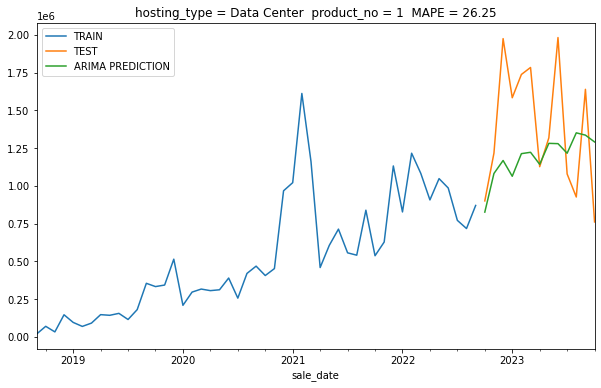

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
MAPE = 0.26459046064502023 hosting_type = Data Center product_no = 2 Best Parameters: (1, 2, 7)


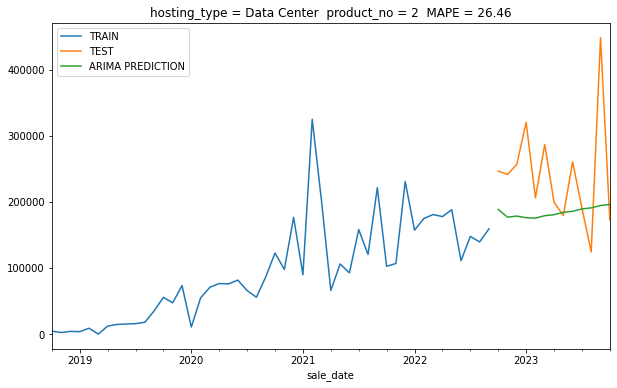

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
MAPE = 0.20039133278737029 hosting_type = Data Center product_no = 5 Best Parameters: (5, 2, 5)


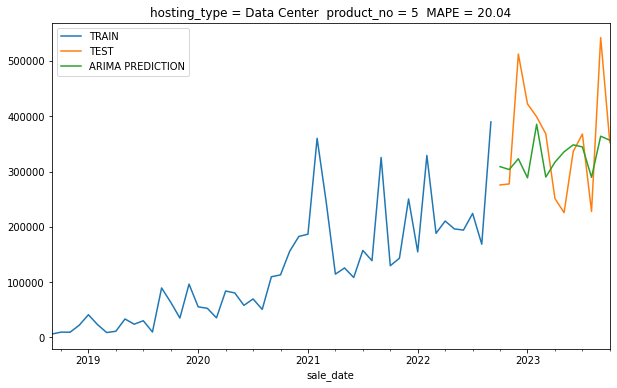

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
MAPE = 0.1530259712488485 hosting_type = Cloud product_no = 1 Best Parameters: (4, 1, 1)


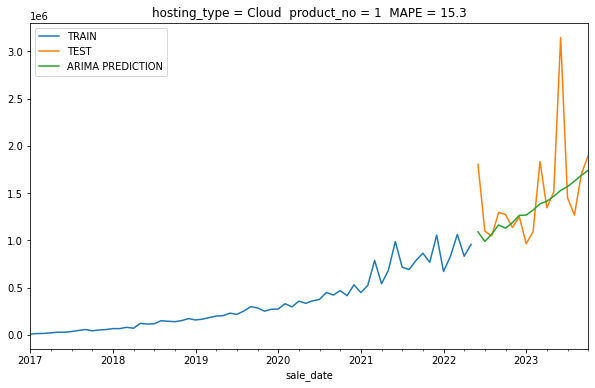

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
MAPE = 0.18118792600331246 hosting_type = Cloud product_no = 2 Best Parameters: (5, 1, 4)


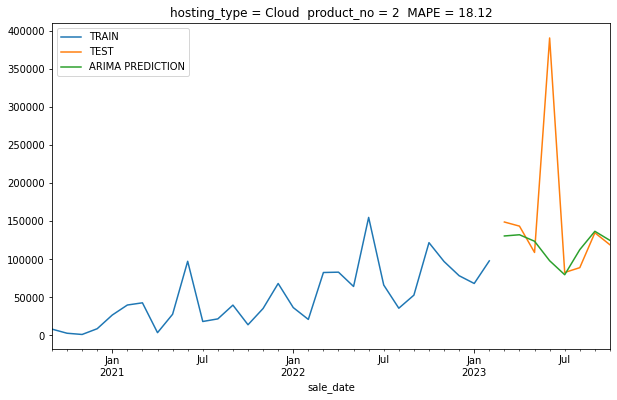

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
5 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
MAPE = 0.38285893521275144 hosting_type = Cloud product_no = 5 Best Parameters: (4, 0, 2)


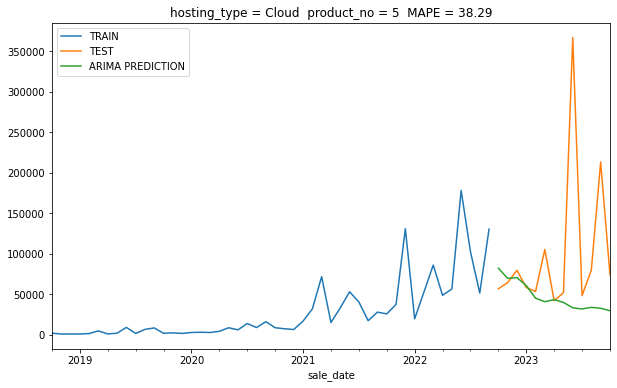

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")



for hosting_type in ['Data Center', 'Cloud']:
    for product_no in [1, 2, 5]:
        df = pd.read_csv('data.csv', parse_dates=['sale_date'])
        df['sale_date'] = pd.to_datetime(df['sale_date'].dt.strftime('%Y-%m'))
        new_df = df[df['sale_date'] < '2023-11-01']
        new_df.set_index('sale_date', inplace=True)
        df = get_product_hosting_df(new_df, product_no, hosting_type).groupby('sale_date').sum()
        df['revenue'] = df['revenue'] + 0.001
        train_size = int(len(df) * 0.8)
        train_df, test_df = df.iloc[:train_size], df.iloc[train_size:]

        p_values, d_values, q_values = range(1,8), range(0,3), range(1,10)
        best_mape, best_params = float('inf')-1, None

        for p in p_values:
            for d in d_values:
                for q in q_values:
                    mape = float('inf')
                    if d == 0:
                        print(p,d)
                    arima_model = ARIMA(train_df['revenue'], order=(p, d, q), enforce_stationarity=False).fit()
                    arima_predictions = arima_model.predict(start=len(train_df), end=len(df)-1)
                    try:
                        mape = mean_absolute_percentage_error(test_df['revenue'], arima_predictions)
                    except:
                        print("Something went wrong")
                    if mape < best_mape:
                        best_mape, best_params = mape, (p, d, q)
       
        final_arima_model = ARIMA(train_df['revenue'], order=best_params,enforce_stationarity=False ).fit()
        final_arima_predictions = final_arima_model.predict(start=len(train_df), end=len(df)-1)

        plt.figure(figsize=(10, 6))
        train_df['revenue'].plot(legend=True, label='TRAIN')
        test_df['revenue'].plot(legend=True, label='TEST')
        final_arima_predictions.plot(legend=True, label='ARIMA PREDICTION')
        plt.title('ARIMA Forecasting with Manual Hyperparameter Tuning')
        arima_mape = mean_absolute_percentage_error(test_df['revenue'], final_arima_predictions)
        plt.title(f'hosting_type = {hosting_type}  product_no = {product_no}  MAPE = {round(100*arima_mape, 2)}')
        print(f'MAPE = {arima_mape}', f'hosting_type = {hosting_type}', f'product_no = {product_no}', f'Best Parameters: {best_params}')
        plt.show()

In [101]:
final_arima_model = ARIMA(train_df['revenue'], order=best_params,  enforce_stationarity=False).fit()

1 0 1 1 0 1 12
1 0 1 1 0 2 12
1 0 1 1 1 1 12
1 0 1 1 1 2 12
1 0 1 2 0 1 12
1 0 1 2 0 2 12
1 0 1 2 1 1 12
1 0 1 2 1 2 12
1 0 2 1 0 1 12
1 0 2 1 0 2 12
1 0 2 1 1 1 12
1 0 2 1 1 2 12
1 0 2 2 0 1 12
1 0 2 2 0 2 12
1 0 2 2 1 1 12
1 0 2 2 1 2 12
1 0 3 1 0 1 12
1 0 3 1 0 2 12
1 0 3 1 1 1 12
1 0 3 1 1 2 12
1 0 3 2 0 1 12
1 0 3 2 0 2 12
1 0 3 2 1 1 12
1 0 3 2 1 2 12
1 0 4 1 0 1 12
1 0 4 1 0 2 12
1 0 4 1 1 1 12
1 0 4 1 1 2 12
1 0 4 2 0 1 12
1 0 4 2 0 2 12
1 0 4 2 1 1 12
1 0 4 2 1 2 12
1 0 5 1 0 1 12
1 0 5 1 0 2 12
1 0 5 1 1 1 12
1 0 5 1 1 2 12
1 0 5 2 0 1 12
1 0 5 2 0 2 12
1 0 5 2 1 1 12
1 0 5 2 1 2 12
1 0 6 1 0 1 12
1 0 6 1 0 2 12
1 0 6 1 1 1 12
1 0 6 1 1 2 12
1 0 6 2 0 1 12
1 0 6 2 0 2 12
1 0 6 2 1 1 12
1 0 6 2 1 2 12
1 0 7 1 0 1 12
1 0 7 1 0 2 12
1 0 7 1 1 1 12
1 0 7 1 1 2 12
1 0 7 2 0 1 12
1 0 7 2 0 2 12
1 0 7 2 1 1 12
1 0 7 2 1 2 12
1 0 8 1 0 1 12
1 0 8 1 0 2 12
1 0 8 1 1 1 12
1 0 8 1 1 2 12
1 0 8 2 0 1 12
1 0 8 2 0 2 12
1 0 8 2 1 1 12
1 0 8 2 1 2 12
1 0 9 1 0 1 12
1 0 9 1 0 2 12
1 0 9 1 1 

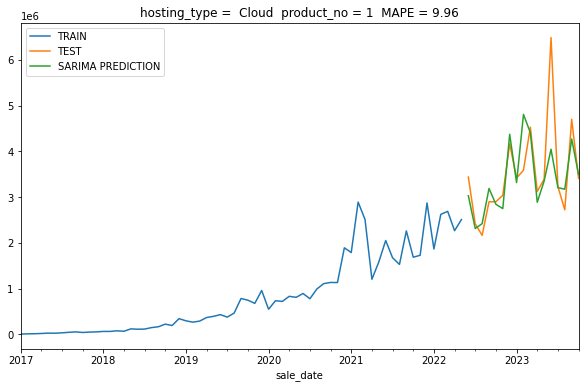

SARIMA Mean Absolute Percentage Error (MAPE) = 0.09956009162532524


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")


for hosting_type in ['Cloud']:
    for product_no in [1]:
        df = pd.read_csv('data.csv', parse_dates=['sale_date'])
        df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
        new_df = df[df['sale_date'] < '2023-11-01']
        df.set_index('sale_date', inplace=True)
        df = get_product_hosting_df(new_df, product_no, hosting_type)
        df = df.groupby('sale_date').sum()
        df['revenue'] = df['revenue'] + 0.001
        
        train_size = int(len(df) * 0.8)
        train_df = df.iloc[:train_size]
        test_df = df.iloc[train_size:]
        # Assuming 'revenue' is the column you want to forecast
        # Assuming 'df' is your DataFrame
        # Apply logarithmic transform to the 'revenue' column
        df['log_revenue'] = np.log1p(df['revenue'])
        # Splitting the data into training and test sets
        train_size = int(len(df) * 0.8)
        train_df = df.iloc[:train_size]
        test_df = df.iloc[train_size:]

        # Define a range of values for p, d, q, P, D, Q, and m
        p_values = range(1, 3)    # Order of the autoregressive (AR) component
        d_values = range(0, 2)    # Order of differencing
        q_values = range(1, 10)    # Order of the moving average (MA) component
        P_values = range(1, 3)    # Seasonal order of the autoregressive (AR) component
        D_values = range(0, 2)    # Seasonal order of differencing
        Q_values = range(1, 3)    # Seasonal order of the moving average (MA) component
        m_values = [12]           # Seasonal period (assuming monthly seasonality)

        best_mse = float('inf')
        best_params = None

        # Perform a grid search over the parameter space
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    for P in P_values:
                        for D in D_values:
                            for Q in Q_values:
                                for m in m_values:
                                    sarima_model = SARIMAX(
                                        train_df['log_revenue'],
                                        order=(p, d, q),
                                        seasonal_order=(P, D, Q, m),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False,
                                    ).fit()
                                    print(p, d, q,P,D,Q, m)

                                    # Make predictions on the test data
                                    sarima_predictions = np.expm1(sarima_model.predict(start=len(train_df), end=len(df)-1))

                                    # Calculate mape
                                    try:
                                        mse = mean_absolute_percentage_error(test_df['revenue'], sarima_predictions)
                                    except:
                                         print("Something went wrong")
                                        
                                        

                                    # Update best parameters if current MSE is lower
                                    if mse < best_mse:
                                        best_mse = mse
                                        best_params = (p, d, q, P, D, Q, m)

        # Use the best parameters to fit the final SARIMA model
        final_sarima_model = SARIMAX(
            train_df['log_revenue'],
            order=(best_params[0], best_params[1], best_params[2]),
            seasonal_order=(best_params[3], best_params[4], best_params[5], best_params[6]),
            enforce_stationarity=False,
            enforce_invertibility=False,
        ).fit()

        # Make predictions on the test set using the final SARIMA model
        final_sarima_predictions = np.expm1(final_sarima_model.predict(start=len(train_df), end=len(df)-1))

        # Plot the results
        plt.figure(figsize=(10, 6))

        # Plot the training data
        train_df['revenue'].plot(legend=True, label='TRAIN')

        # Plot the test data
        test_df['revenue'].plot(legend=True, label='TEST')

        # Plot the predicted values using the final SARIMA model
        final_sarima_predictions.plot(legend=True, label='SARIMA PREDICTION')
        sarima_mape = mean_absolute_percentage_error(test_df['revenue'], final_sarima_predictions)
        plt.title(f'hosting_type =  {hosting_type}  ' +  f'product_no = {product_no}' + f'  MAPE = {round(100*sarima_mape,2)}')
        print(f'MAPE = {sarima_mape}', f'hosting_type =  {hosting_type}', f'product_no = {product_no}',f'Best Parameters: {best_params}')
        plt.show()

        # Calculate Mean Absolute Percentage Error (MAPE)
        
        print(f'SARIMA Mean Absolute Percentage Error (MAPE) = {sarima_mape}')
        
        
        
        
        

MAPE = 0.10823508630196133 hosting_type =  Cloud product_no = 1 Best Parameters: (2, 0, 2, 1, 1, 2, 12)


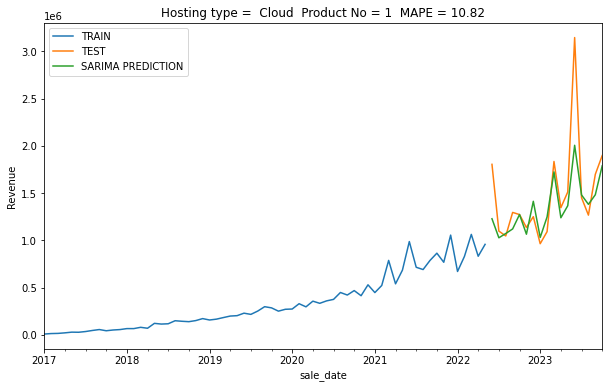

SARIMA Mean Absolute Percentage Error (MAPE) = 0.10823508630196133
MAPE = 0.1638096437597963 hosting_type =  Cloud product_no = 2 Best Parameters: (2, 1, 1, 2, 0, 1, 12)


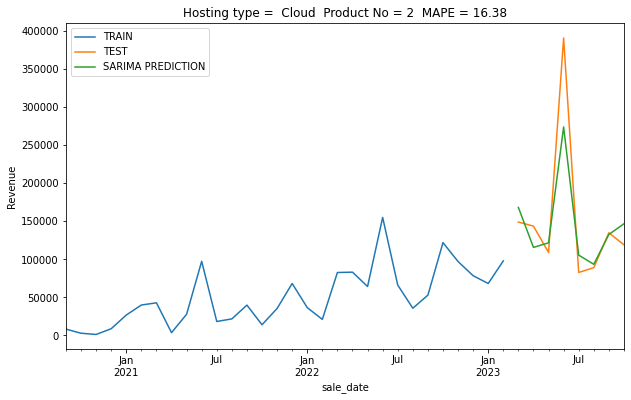

SARIMA Mean Absolute Percentage Error (MAPE) = 0.1638096437597963


KeyboardInterrupt: 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")


for hosting_type in ['Cloud', 'Data Center']:
    for product_no in [1,2,5]:
        df = pd.read_csv('data.csv', parse_dates=['sale_date'])
        df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
        new_df = df[df['sale_date'] < '2023-11-01']
        df.set_index('sale_date', inplace=True)
        df = get_product_hosting_df(new_df, product_no, hosting_type)
        df = df.groupby('sale_date').sum()
        df['revenue'] = df['revenue'] + 0.001
        
        train_size = int(len(df) * 0.8)
        train_df = df.iloc[:train_size]
        test_df = df.iloc[train_size:]

        # Define a range of values for p, d, q, P, D, Q, and m
        p_values = range(1, 3)    # Order of the autoregressive (AR) component
        d_values = range(0, 2)    # Order of differencing
        q_values = range(1, 3)    # Order of the moving average (MA) component
        P_values = range(1, 3)    # Seasonal order of the autoregressive (AR) component
        D_values = range(0, 2)    # Seasonal order of differencing
        Q_values = range(1, 3)    # Seasonal order of the moving average (MA) component
        m_values = [12]           # Seasonal period (assuming monthly seasonality)

        best_mse = float('inf')
        best_params = None

        # Perform a grid search over the parameter space
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    for P in P_values:
                        for D in D_values:
                            for Q in Q_values:
                                for m in m_values:
                                    sarima_model = SARIMAX(
                                        train_df['revenue'],
                                        order=(p, d, q),
                                        seasonal_order=(P, D, Q, m),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False,
                                    ).fit()

                                    # Make predictions on the test data
                                    sarima_predictions = sarima_model.predict(start=len(train_df), end=len(df)-1)

                                    # Calculate mape
                                    try:
                                        mse = mean_absolute_percentage_error(test_df['revenue'], sarima_predictions)
                                    except:
                                         print("Something went wrong")
                                        
                                        

                                    # Update best parameters if current MSE is lower
                                    if mse < best_mse:
                                        best_mse = mse
                                        best_params = (p, d, q, P, D, Q, m)

        # Use the best parameters to fit the final SARIMA model
        final_sarima_model = SARIMAX(
            train_df['revenue'],
            order=(best_params[0], best_params[1], best_params[2]),
            seasonal_order=(best_params[3], best_params[4], best_params[5], best_params[6]),
            enforce_stationarity=False,
            enforce_invertibility=False,
        ).fit()

        # Make predictions on the test set using the final SARIMA model
        final_sarima_predictions = final_sarima_model.predict(start=len(train_df), end=len(df)-1)

        # Plot the results
        plt.figure(figsize=(10, 6))

        # Plot the training data
        train_df['revenue'].plot(legend=True, label='TRAIN')

        # Plot the test data
        test_df['revenue'].plot(legend=True, label='TEST')

        # Plot the predicted values using the final SARIMA model
        final_sarima_predictions.plot(legend=True, label='SARIMA PREDICTION')
        sarima_mape = mean_absolute_percentage_error(test_df['revenue'], final_sarima_predictions)
        plt.title(f'Hosting type =  {hosting_type}  ' +  f'Product No = {product_no}' + f'  MAPE = {round(100*sarima_mape,2)}')
        plt.ylabel("Revenue")
        print(f'MAPE = {sarima_mape}', f'hosting_type =  {hosting_type}', f'product_no = {product_no}',f'Best Parameters: {best_params}')
        plt.show()

        # Calculate Mean Absolute Percentage Error (MAPE)
        
        print(f'SARIMA Mean Absolute Percentage Error (MAPE) = {sarima_mape}')
        
        
        
        
        

# Plotting SARIMA Confidence Intervals (no log transform)

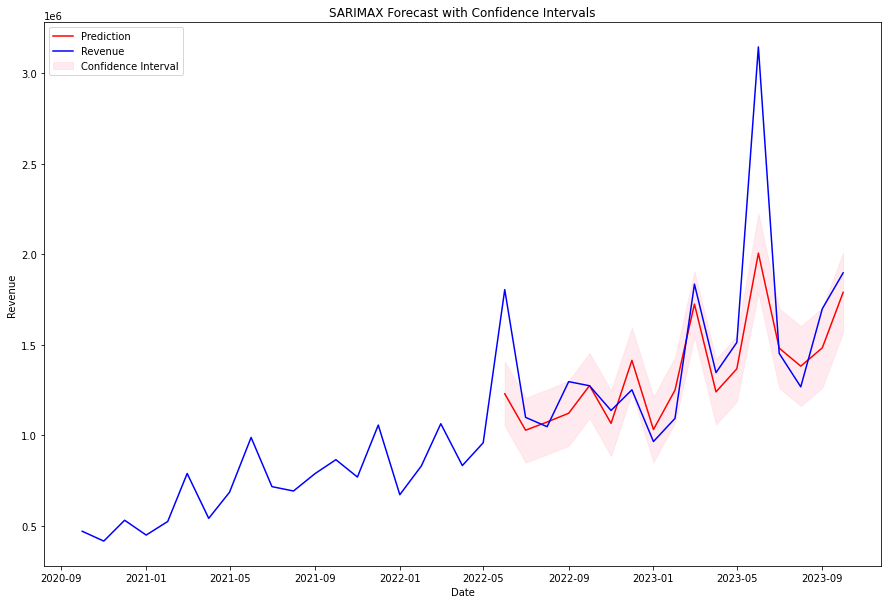

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('data.csv', parse_dates=['sale_date'])
df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
new_df = df[df['sale_date'] < '2023-11-01']
df.set_index('sale_date', inplace=True)
df = get_product_hosting_df(new_df, 1, 'Cloud')
df = df.groupby('sale_date').sum()

df['log_revenue'] = np.log1p(df['revenue'])
df['revenue'] = df['revenue'] + 0.001

train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

sarima_model = SARIMAX(
    train_df['revenue'],
    order=(2, 0, 2),
    seasonal_order=(1, 1, 2, 12),
    enforce_stationarity=False,
    enforce_invertibility=False,
    ).fit()



forecast_steps = len(test_df)  
forecast = sarima_model.get_forecast(steps=forecast_steps, alpha=0.05)  

plt.figure(figsize=(15, 10))

forecast_ci = forecast.conf_int()
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Prediction', color='red')
plt.plot( df.iloc[train_size-20:]['revenue'], label='Revenue', color='blue')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('SARIMAX Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()



# SARIMA confidence intervals with log transform

0.0991242564223745


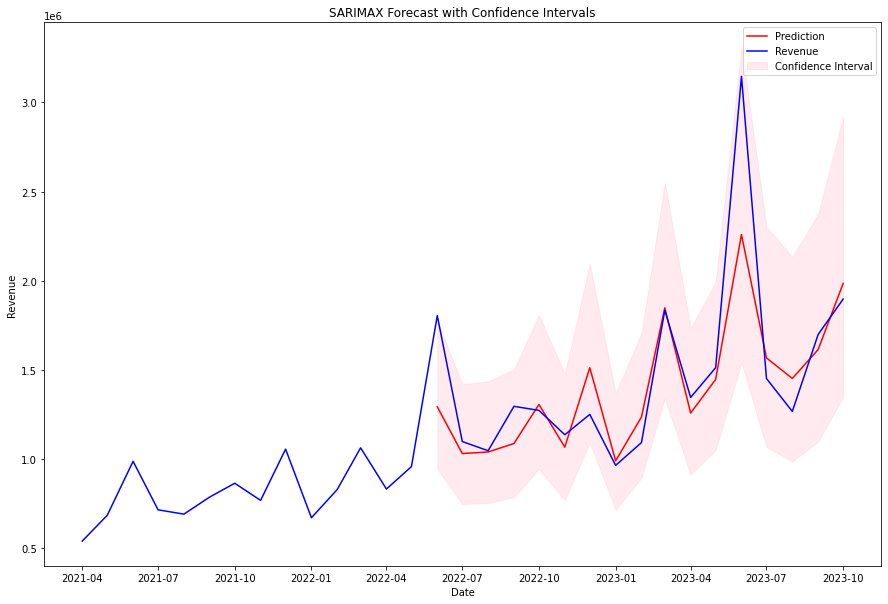

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('data.csv', parse_dates=['sale_date'])
df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
new_df = df[df['sale_date'] < '2023-11-01']
df.set_index('sale_date', inplace=True)
df = get_product_hosting_df(new_df, 1, 'Cloud')
df = df.groupby('sale_date').sum()

df['log_revenue'] = np.log1p(df['revenue'])
df['revenue'] = df['revenue'] + 0.001

train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]
sarima_model = SARIMAX(
    train_df['log_revenue'],
    order=(1, 0, 1),
    seasonal_order=(2, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False,
    ).fit()



forecast_steps = len(test_df)  
forecast = sarima_model.get_forecast(steps=forecast_steps, alpha=0.05)  

plt.figure(figsize=(15, 10))
sarima_mape = mean_absolute_percentage_error(test_df['revenue'], np.expm1(forecast.predicted_mean))
print(sarima_mape)
forecast_ci = forecast.conf_int()
plt.plot(forecast.predicted_mean.index, np.expm1(forecast.predicted_mean), label='Prediction', color='red')
plt.plot( df.iloc[train_size-14:]['revenue'], label='Revenue', color='blue')
plt.fill_between(forecast_ci.index, np.expm1(forecast_ci.iloc[:, 0]), np.expm1(forecast_ci.iloc[:, 1]), color='pink', alpha=0.3, label='Confidence Interval')

plt.title('SARIMAX Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('data.csv', parse_dates=['sale_date'])
df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
new_df = df[df['sale_date'] < '2023-11-01']
df.set_index('sale_date', inplace=True)
df = get_product_hosting_df(new_df, 1, 'Cloud')
df = df.groupby('sale_date').sum()

df['log_revenue'] = np.log1p(df['revenue'])
df['revenue'] = df['revenue'] + 0.001

train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

sarima_model = SARIMAX(
    train_df['revenue'],
    order=(2, 0, 2),
    seasonal_order=(1, 1, 2, 12),
    enforce_stationarity=False,
    enforce_invertibility=False,
    ).fit()



forecast_steps = len(test_df)  
forecast = sarima_model.get_forecast(steps=forecast_steps, alpha=0.05)  

plt.figure(figsize=(15, 10))

forecast_ci = forecast.conf_int()
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Prediction', color='red')
plt.plot( df.iloc[train_size-20:]['revenue'], label='Revenue', color='blue')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('SARIMAX Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()



 Mean Absolute Percentage Error (MAPE) = 1.4698253843163782 5 Cloud


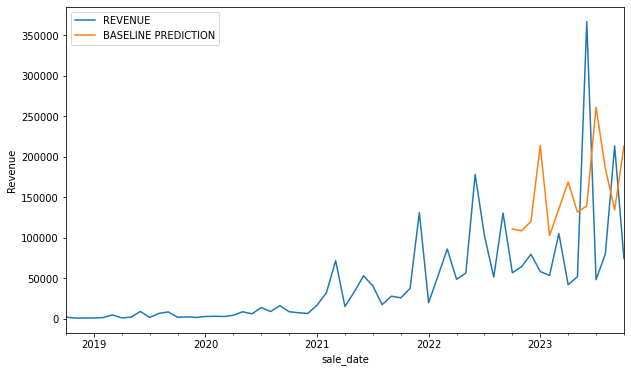

In [9]:
def baseline_model(df_test, df_train):
    
    
    mean1  = np.mean(df_train['revenue'].iloc[-int(len(df_test)/2):])
    predictions = df_train['revenue'].iloc[-len(df_test):]
    
    
    predictions= (predictions - min(predictions[0], np.mean(df_train['revenue'][-4:-1])) + max(predictions[0], np.mean(df_train['revenue'][-4:-1])))
    predictions.index = predictions.index + pd.DateOffset(months=len(df_test))
    
    return predictions

#for hosting_type in ['Data Center','Cloud']:
#    for product_no in [1,2,5]:
df = pd.read_csv('data.csv', parse_dates=['sale_date'])
df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
new_df = df[df['sale_date'] < '2023-11-01']
df.set_index('sale_date', inplace=True)
df = get_product_hosting_df(new_df, 5, 'Cloud')
df = df.groupby('sale_date').sum()
df['revenue'] = df['revenue'] + 0.001

train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]


baseline_predictions = baseline_model(test_df, train_df)

baseline_mape = mean_absolute_percentage_error(test_df['revenue'],baseline_predictions)




print(f' Mean Absolute Percentage Error (MAPE) = {baseline_mape}', product_no, hosting_type)

# Plot the results
plt.figure(figsize=(10, 6))


# Plot the training data
df['revenue'].plot(legend=True, label='REVENUE')

baseline_predictions.plot(legend=True, label='BASELINE PREDICTION')
plt.ylabel("Revenue")
plt.show()


In [4]:
import pandas as pd
#for hosting_type in ['Data Center','Cloud']:
#    for product_no in [1,2,5]:
df = pd.read_csv('data.csv', parse_dates=['sale_date'])
df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
new_df = df[df['sale_date'] < '2023-11-01']
df.set_index('sale_date', inplace=True)
df = get_product_hosting_df(new_df, 5, 'Cloud')
df = df.groupby('sale_date').sum()
df['revenue'] = df['revenue'] + 0.001

train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

Text(0.5, 1.0, 'Product 1, Cloud. Natural Logarithm of Revenue')

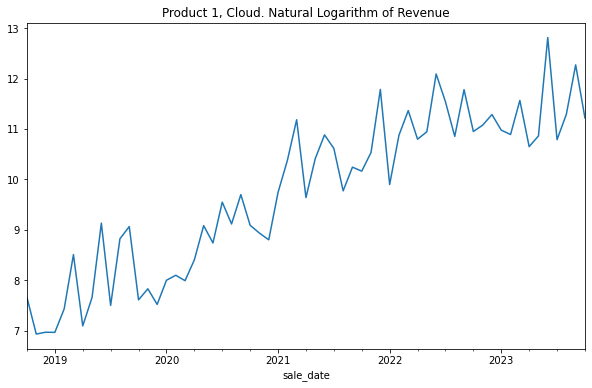

In [8]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(10, 6))

df['log_revenue'] = np.log1p(df['revenue'])
df['log_revenue'].plot()
plt.title("Product 1, Cloud. Natural Logarithm of Revenue")

Text(0.5, 1.0, 'Product 1. Cloud. Revenue')

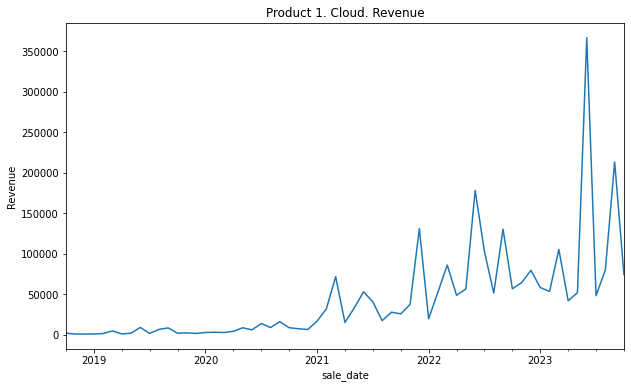

In [7]:
plt.figure(figsize=(10, 6))
plt.ylabel("Revenue")
df['revenue'].plot()
plt.title("Product 1. Cloud. Revenue")

# Predicting November

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('data.csv', parse_dates=['sale_date'])
df['sale_date'] = pd.to_datetime(pd.to_datetime(df['sale_date']).dt.strftime('%Y-%m'))
new_df = df[df['sale_date'] < '2023-11-01']
df.set_index('sale_date', inplace=True)
df = get_product_hosting_df(new_df, 1, 'Cloud')
df = df.groupby('sale_date').sum()

df['log_revenue'] = np.log1p(df['revenue'])
df['revenue'] = df['revenue'] + 0.001

train_size = int(len(df))
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]
sarima_model = SARIMAX(
    train_df['log_revenue'],
    order=(1, 0, 1),
    seasonal_order=(2, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False,
    ).fit()



forecast_steps = 1
forecast = sarima_model.get_forecast(steps=forecast_steps, alpha=0.05)  
print( np.expm1(forecast.predicted_mean))
forecast_ci = forecast.conf_int()


2023-11-01    1.617708e+06
Freq: MS, dtype: float64


In [38]:
real_nov_rev = 1905342 

In [40]:
print(mean_absolute_percentage_error([1905342],[1.617708e+06]))

0.1509618745611024


In [ ]:
confid